# Syntaktische Analyse / Text Syntax and Understanding

nach Sarkar, angepasst von Heiko Rölke

## Wortarterkennung / POS-Tagging

POS = part of speech

In [42]:
import nltk
#nltk.download('averaged_perceptron_tagger')
#nltk.download('treebank')
#nltk.download('conll2000')

In [1]:
sentence = "US unveils world's most powerful supercomputer, beats China."

import pandas as pd
import spacy
nlp = spacy.load("en_core_web_trf")
sentence_nlp = nlp(sentence)
# POS tagging with Spacy 
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type']).T

/home/yhutter/GitRepos/fhgr-ta/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,0,1,2,3,4,5,6,7,8,9,10
Word,US,unveils,world,'s,most,powerful,supercomputer,",",beats,China,.
POS tag,NNP,VBZ,NN,POS,RBS,JJ,NN,",",VBZ,NNP,.
Tag type,PROPN,VERB,NOUN,PART,ADV,ADJ,NOUN,PUNCT,VERB,PROPN,PUNCT


In [4]:
# POS tagging with nltk
import nltk
nltk_pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag']).T

,0,1,2,3,4,5,6,7,8,9,10
Word,US,unveils,world,'s,most,powerful,supercomputer,",",beats,China,.
POS tag,NNP,JJ,NN,POS,RBS,JJ,NN,",",VBZ,NNP,.


In [7]:
from nltk.corpus import treebank

data = treebank.tagged_sents()
train_data = data[:3500]
test_data = data[3500:]
print(train_data[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


In [8]:
# default tagger
from nltk.tag import DefaultTagger

dt = DefaultTagger('NN')
# accuracy on test data
# dt.evaluate(test_data)  # Original von Sarkar, mittlerweile deprecated
dt.accuracy(gold=test_data)

0.1454158195372253

In [9]:
# tagging our sample headline
dt.tag(nltk.word_tokenize(sentence))

[('US', 'NN'),
 ('unveils', 'NN'),
 ('world', 'NN'),
 ("'s", 'NN'),
 ('most', 'NN'),
 ('powerful', 'NN'),
 ('supercomputer', 'NN'),
 (',', 'NN'),
 ('beats', 'NN'),
 ('China', 'NN'),
 ('.', 'NN')]

In [10]:
# regex tagger
from nltk.tag import RegexpTagger

# define regex tag patterns
patterns = [
    (r'.*ing$', 'VBG'),  # gerunds
    (r'.*ed$', 'VBD'),  # simple past
    (r'.*es$', 'VBZ'),  # 3rd singular present
    (r'.*ould$', 'MD'),  # modals
    (r'.*\'s$', 'NN$'),  # possessive nouns
    (r'.*s$', 'NNS'),  # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')  # nouns (default) ... 
]
rt = RegexpTagger(patterns)

In [11]:
# accuracy on test data
rt.accuracy(test_data)

0.24039113176493368

In [12]:
# tagging our sample headline
rt.tag(nltk.word_tokenize(sentence))

[('US', 'NN'),
 ('unveils', 'NNS'),
 ('world', 'NN'),
 ("'s", 'NN$'),
 ('most', 'NN'),
 ('powerful', 'NN'),
 ('supercomputer', 'NN'),
 (',', 'NN'),
 ('beats', 'NNS'),
 ('China', 'NN'),
 ('.', 'NN')]

## N gram taggers

In [13]:
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import TrigramTagger

ut = UnigramTagger(train_data)
bt = BigramTagger(train_data)
tt = TrigramTagger(train_data)
# testing performance of unigram tagger
print(ut.accuracy(test_data))
print(ut.tag(nltk.word_tokenize(sentence)))

0.8607803272340013
[('US', 'NNP'), ('unveils', None), ('world', 'NN'), ("'s", 'POS'), ('most', 'JJS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', None), ('China', 'NNP'), ('.', '.')]


In [14]:
# testing performance of bigram tagger
print(bt.accuracy(test_data))
print(bt.tag(nltk.word_tokenize(sentence)))

0.13466937748087907
[('US', None), ('unveils', None), ('world', None), ("'s", None), ('most', None), ('powerful', None), ('supercomputer', None), (',', None), ('beats', None), ('China', None), ('.', None)]


In [15]:
# testing performance of trigram tagger
print(tt.accuracy(test_data))
print(tt.tag(nltk.word_tokenize(sentence)))

0.08064672281924679
[('US', None), ('unveils', None), ('world', None), ("'s", None), ('most', None), ('powerful', None), ('supercomputer', None), (',', None), ('beats', None), ('China', None), ('.', None)]


In [16]:
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff


ct = combined_tagger(train_data=train_data,
                     taggers=[UnigramTagger, BigramTagger, TrigramTagger],
                     backoff=rt)

In [17]:
# evaluating the new combined tagger with backoff taggers
print(ct.accuracy(test_data))
print(ct.tag(nltk.word_tokenize(sentence)))

0.9094781682641108
[('US', 'NNP'), ('unveils', 'NNS'), ('world', 'NN'), ("'s", 'POS'), ('most', 'RBS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'NNS'), ('China', 'NNP'), ('.', '.')]


In [18]:
from nltk.classify import NaiveBayesClassifier
from nltk.tag.sequential import ClassifierBasedPOSTagger

nbt = ClassifierBasedPOSTagger(train=train_data,
                               classifier_builder=NaiveBayesClassifier.train)

In [19]:
# evaluate tagger on test data and sample sentence
print(nbt.accuracy(test_data))
print(nbt.tag(nltk.word_tokenize(sentence)))

0.9306806079969019
[('US', 'PRP'), ('unveils', 'VBZ'), ('world', 'VBN'), ("'s", 'POS'), ('most', 'JJS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'VBZ'), ('China', 'NNP'), ('.', '.')]


# Shallow Parsing or Chunking

In [20]:
from nltk.corpus import treebank_chunk

data = treebank_chunk.chunked_sents()

train_data = data[:3500]
test_data = data[3500:]
# view sample data
print(train_data[7])

(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


In [21]:
from nltk.chunk import RegexpParser

# get POS tagged sentence
tagged_simple_sent = nltk.pos_tag(nltk.word_tokenize(sentence))
print('POS Tags:', tagged_simple_sent)

POS Tags: [('US', 'NNP'), ('unveils', 'JJ'), ('world', 'NN'), ("'s", 'POS'), ('most', 'RBS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'VBZ'), ('China', 'NNP'), ('.', '.')]


(S
  (NP US/NNP)
  (NP unveils/JJ world/NN)
  's/POS
  most/RBS
  (NP powerful/JJ supercomputer/NN)
  ,/,
  beats/VBZ
  (NP China/NNP)
  ./.)


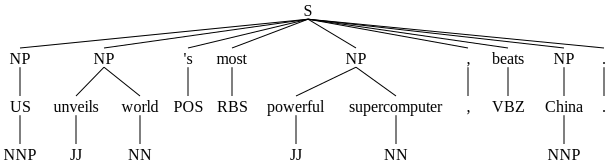

In [22]:
# illustrate NP chunking based on explicit chunk patterns
chunk_grammar = """
NP: {<DT>?<JJ>*<NN.*>}
"""
rc = RegexpParser(chunk_grammar)
c = rc.parse(tagged_simple_sent)
# print and view chunked sentence using chunking
print(c)
c

(S
  (NP US/NNP)
  unveils/JJ
  (NP world/NN 's/POS most/RBS)
  powerful/JJ
  (NP supercomputer/NN ,/,)
  beats/VBZ
  (NP China/NNP ./.))


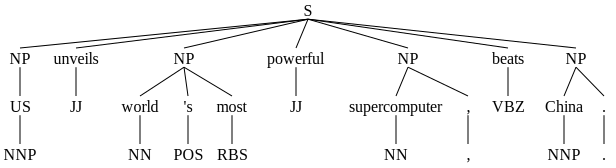

In [23]:
# illustrate NP chunking based on explicit chink patterns
chink_grammar = """
NP:
    {<.*>+}             # Chunk everything as NP
    }<VBZ|VBD|JJ|IN>+{  # Chink sequences of VBD\VBZ\JJ\IN
"""
rc = RegexpParser(chink_grammar)
c = rc.parse(tagged_simple_sent)
# print and view chunked sentence using chinking
print(c)
c

In [24]:
# create a more generic shallow parser
grammar = """
NP: {<DT>?<JJ>?<NN.*>}  
ADJP: {<JJ>}
ADVP: {<RB.*>}
PP: {<IN>}      
VP: {<MD>?<VB.*>+}
"""
rc = RegexpParser(grammar)
c = rc.parse(tagged_simple_sent)

(S
  (NP US/NNP)
  (NP unveils/JJ world/NN)
  's/POS
  (ADVP most/RBS)
  (NP powerful/JJ supercomputer/NN)
  ,/,
  (VP beats/VBZ)
  (NP China/NNP)
  ./.)


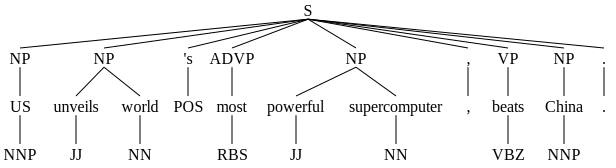

In [25]:
# print and view shallow parsed sample sentence
print(c)
c

In [26]:
# Evaluate parser performance on test data
print(rc.accuracy(test_data))

ChunkParse score:
    IOB Accuracy:  46.1%%
    Precision:     19.9%%
    Recall:        43.3%%
    F-Measure:     27.3%%


In [27]:
# conll - Dateiformat im NLP, geht auf Conference on Natural Language Learning zurück
from nltk.chunk.util import tree2conlltags, conlltags2tree

# look at a sample training tagged sentence
train_sent = train_data[7]
print(train_sent)
# get the (word, POS tag, Chunk tag) triples for each token
wtc = tree2conlltags(train_sent)
wtc

(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


[('A', 'DT', 'B-NP'),
 ('Lorillard', 'NNP', 'I-NP'),
 ('spokewoman', 'NN', 'I-NP'),
 ('said', 'VBD', 'O'),
 (',', ',', 'O'),
 ('``', '``', 'O'),
 ('This', 'DT', 'B-NP'),
 ('is', 'VBZ', 'O'),
 ('an', 'DT', 'B-NP'),
 ('old', 'JJ', 'I-NP'),
 ('story', 'NN', 'I-NP'),
 ('.', '.', 'O')]

In [28]:
# get shallow parsed tree back from the WTC triples
tree = conlltags2tree(wtc)
print(tree)

(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


In [29]:
# tags und chunk-tags extrahieren, wörter verwerfen
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]


# Tagger sequentiell kombinieren (wie im POS-Beispiel)
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

In [30]:
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import ChunkParserI


# eigenen Chunk-Algorithmus umsetzen, basierend auf bi- und uni-gram taggern
class NGramTagChunker(ChunkParserI):

    def __init__(self, train_sentences,
                 tagger_classes=[UnigramTagger, BigramTagger]):  # beim Initialisieren wird der Chunker trainiert
        train_sent_tags = conll_tag_chunks(train_sentences)  # pos-tags und chunk-tags extrahieren
        self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)  # chunk-tagger erstellen/trainieren

    def parse(self, tagged_sentence):  # wendet den trainierten Chunk-Tagger auf neuen Satz an - Vorraussetzung: POS-Tags
        if not tagged_sentence:
            return None
        pos_tags = [tag for word, tag in tagged_sentence]  # POS-Tags extrahieren/isolieren
        chunk_pos_tags = self.chunk_tagger.tag(pos_tags)  # chunk-tags ermitteln, zusätzlich zu pos-tags
        chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]  # chunk-tags isolieren (eigentlich nicht notwendig)
        wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag)
                    in zip(tagged_sentence, chunk_tags)]  # tag-tripel herstellen als Grundlage für die Parsebaum-Erstellung
        return conlltags2tree(wpc_tags)  # Parsebaum zurückgeben

In [31]:
# train the shallow parser
ntc = NGramTagChunker(train_data)

In [32]:
# test parser performance on test data
print(ntc.accuracy(test_data))

ChunkParse score:
    IOB Accuracy:  97.2%%
    Precision:     91.4%%
    Recall:        94.3%%
    F-Measure:     92.8%%


(S
  (NP US/NNP)
  unveils/VBZ
  (NP world/NN 's/POS most/RBS powerful/JJ supercomputer/NN)
  ,/,
  beats/VBZ
  (NP China/NNP)
  ./.)


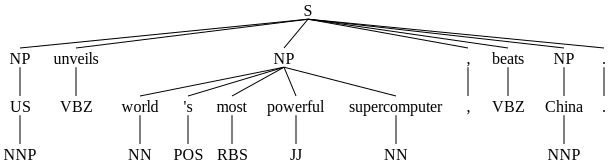

In [33]:
# parse our sample sentence
sentence_nlp = nlp(sentence)  # spacy wird hier nur für das pos-tagging gebraucht
tagged_sentence = [(word.text, word.tag_) for word in sentence_nlp]
tree = ntc.parse(tagged_sentence)
print(tree)
tree

In [36]:
from nltk.corpus import conll2000

wsj_data = conll2000.chunked_sents()
train_wsj_data = wsj_data[:10000]
test_wsj_data = wsj_data[10000:]
# look at a sample sentence in the corpus
print(train_wsj_data[10])

(S
  (NP He/PRP)
  (VP reckons/VBZ)
  (NP the/DT current/JJ account/NN deficit/NN)
  (VP will/MD narrow/VB)
  (PP to/TO)
  (NP only/RB #/# 1.8/CD billion/CD)
  (PP in/IN)
  (NP September/NNP)
  ./.)


In [37]:
# train the shallow parser
tc = NGramTagChunker(train_wsj_data)


In [38]:
# test performance on the test data
print(tc.accuracy(test_wsj_data))

ChunkParse score:
    IOB Accuracy:  89.1%%
    Precision:     80.3%%
    Recall:        86.1%%
    F-Measure:     83.1%%


(S
  (NP US/NNP)
  (VP unveils/VBZ)
  (NP world/NN)
  (NP 's/POS most/RBS powerful/JJ supercomputer/NN)
  ,/,
  (VP beats/VBZ)
  (NP China/NNP)
  ./.)


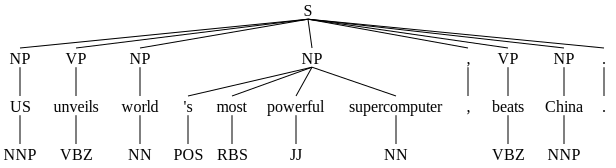

In [39]:
# parse our sample sentence
tree = tc.parse(tagged_sentence)
print(tree)
tree

# Dependency Parsing

In [40]:
dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'
for token in sentence_nlp:
    print(dependency_pattern.format(word=token.orth_,
                                    w_type=token.dep_,
                                    left=[t.orth_
                                          for t
                                          in token.lefts],
                                    right=[t.orth_
                                           for t
                                           in token.rights]))

[]<---US[nsubj]--->[]
--------
['US']<---unveils[ROOT]--->['supercomputer', ',', 'beats', '.']
--------
[]<---world[poss]--->["'s"]
--------
[]<---'s[case]--->[]
--------
[]<---most[advmod]--->[]
--------
['most']<---powerful[amod]--->[]
--------
['world', 'powerful']<---supercomputer[dobj]--->[]
--------
[]<---,[punct]--->[]
--------
[]<---beats[dep]--->['China']
--------
[]<---China[dobj]--->[]
--------
[]<---.[punct]--->[]
--------


In [41]:
from spacy import displacy

displacy.render(sentence_nlp, jupyter=True,
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})